In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [2]:
dicts = []
for seed in range(1000):
    with open('masks_lenet300/vs_sparsity=0.9_seed=' + str(seed), 'rb') as f:
        dicts.append(pickle.load(f))
len(dicts)

1000

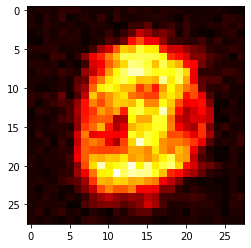

In [6]:
plt.imshow(np.sum(dicts[np.random.randint(1000)]['w1'], axis=(1)).reshape(28,28), cmap='hot')

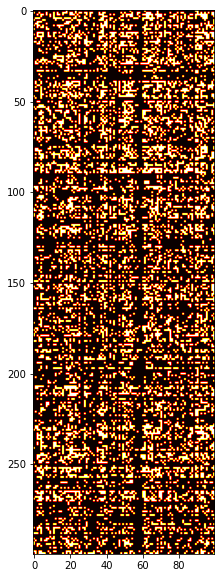

In [12]:
plt.figure(figsize=(7,10))
plt.imshow(dicts[np.random.randint(1000)]['w2'], cmap='hot')

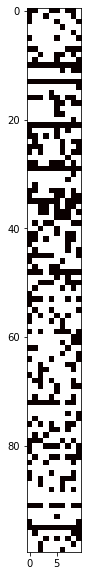

In [5]:
plt.figure(figsize=(7,10))
plt.imshow(dicts[np.random.randint(1000)]['w3'], cmap='hot')

In [7]:
w1s = []
for d in dicts:
    w1s.append(d['w1'])
w2s = []
for d in dicts:
    w2s.append(d['w2'])
w3s = []
for d in dicts:
    w3s.append(d['w3'])

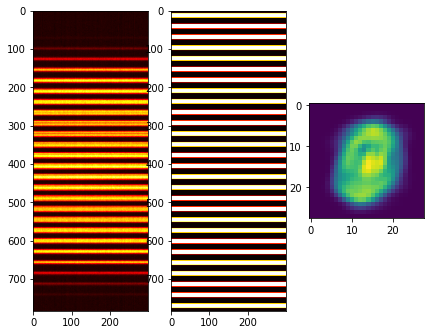

In [9]:
plt.figure(figsize=(7,10))
plt.subplot(131)
plt.imshow(np.sum(w1s, axis=0), cmap='hot')
plt.subplot(132)
plt.imshow(np.array([[0 for _ in range(300)] if i%28<8 or i%28>19 else [1 for _ in range(300)] for i in range(28*28)]), cmap='hot')
plt.subplot(133)
plt.imshow(np.sum(w1s, axis=(0,2)).reshape(28,28))

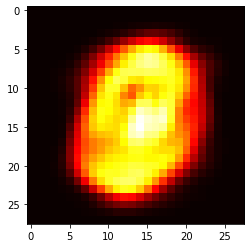

In [10]:
plt.imshow(np.sum(w1s, axis=(0,2)).reshape(28,28), cmap='hot')

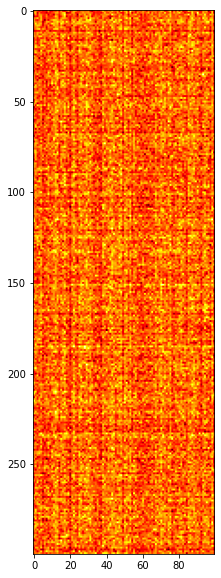

In [12]:
plt.figure(figsize=(7,10))
plt.imshow(np.sum(w2s, axis=0), cmap='hot')

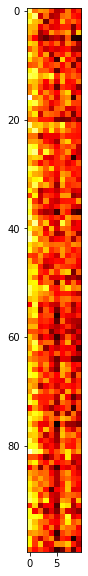

In [14]:
plt.figure(figsize=(7,10))
plt.imshow(np.sum(w3s, axis=0), cmap='hot')

In [15]:
ws_total = np.array([np.sum(w1s, axis=0), np.sum(w2s, axis=0), np.sum(w3s, axis=0)])
ws_total.shape

(3,)

In [16]:
total_elems = np.prod(np.sum(w1s, axis=0).shape) + np.prod(np.sum(w2s, axis=0).shape) + np.prod(np.sum(w3s, axis=0).shape)

In [17]:
total_elems

266200

In [23]:
w1_sparsity = np.sum(w1s) / np.prod(np.array(w1s).shape)
w2_sparsity = np.sum(w2s) / np.prod(np.array(w2s).shape)
w3_sparsity = np.sum(w3s) / np.prod(np.array(w3s).shape)
print('w1:', w1_sparsity, '\nw2:', w2_sparsity, '\nw3:', w3_sparsity)

w1: 0.07607248299319729 
w2: 0.270437 
w3: 0.65563


In [50]:
threshold1 = 218
threshold2 = 279
threshold3 = 646
w1_thresholded = np.sum(w1s, axis=0) > threshold1
w2_thresholded = np.sum(w2s, axis=0) > threshold2
w3_thresholded = np.sum(w3s, axis=0) > threshold3

w1_sparsity_t = np.sum(w1_thresholded) / np.prod(np.array(w1_thresholded).shape)
w2_sparsity_t = np.sum(w2_thresholded) / np.prod(np.array(w2_thresholded).shape)
w3_sparsity_t = np.sum(w3_thresholded) / np.prod(np.array(w3_thresholded).shape)
print('w1:', w1_sparsity_t, '\nw2:', w2_sparsity_t, '\nw3:', w3_sparsity_t)

w1: 0.07614795918367347 
w2: 0.26043333333333335 
w3: 0.658


In [51]:
(np.sum(w1_thresholded) + np.sum(w2_thresholded) + np.sum(w3_thresholded)) / total_elems

0.09910217881292262

In [37]:
np.sum(w1_thresholded)

1846

In [38]:
dicts[0]['b3']

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [52]:
new_mask = {}
new_mask['b1'] = dicts[0]['b1']
new_mask['b2'] = dicts[0]['b2']
new_mask['b3'] = dicts[0]['b3']

new_mask['w1'] = w1_thresholded.astype(np.float32)
new_mask['w2'] = w2_thresholded.astype(np.float32)
new_mask['w3'] = w3_thresholded.astype(np.float32)

In [53]:
new_mask['w2']

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

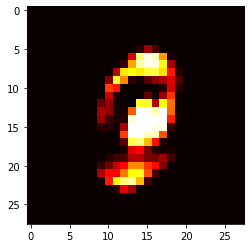

In [54]:
plt.imshow(np.sum(new_mask['w1'], axis=(1)).reshape(28,28), cmap='hot')

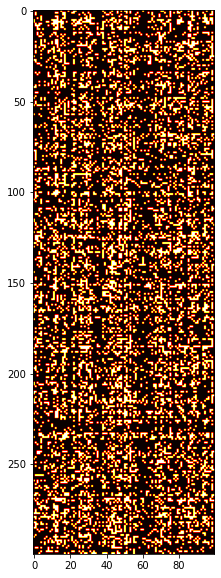

In [55]:
plt.figure(figsize=(7,10))
plt.imshow(new_mask['w2'], cmap='hot')

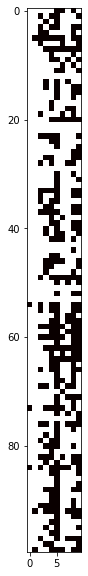

In [56]:
plt.figure(figsize=(7,10))
plt.imshow(new_mask['w3'], cmap='hot')

In [57]:
with open('masks_lenet300/vs_spa90', 'wb') as f:
    pickle.dump(new_mask, f)

In [66]:
# 0.9
train_avg_mask = 'itr100: (train/val) los:0.871/0.703 acc:0.670/0.810 spa:0.901 (t:0.5) \
itr200: (train/val) los:0.569/0.587 acc:0.870/0.840 spa:0.901 (t:0.5) \
itr300: (train/val) los:0.522/0.841 acc:0.800/0.800 spa:0.901 (t:0.4) \
itr400: (train/val) los:0.419/0.478 acc:0.860/0.850 spa:0.901 (t:0.4) \
itr500: (train/val) los:0.545/0.508 acc:0.850/0.880 spa:0.901 (t:0.4) \
itr600: (train/val) los:0.427/0.429 acc:0.890/0.870 spa:0.901 (t:0.4) \
itr700: (train/val) los:0.437/0.381 acc:0.890/0.880 spa:0.901 (t:0.4) \
itr800: (train/val) los:0.398/0.463 acc:0.860/0.860 spa:0.901 (t:0.4) \
itr900: (train/val) los:0.348/0.574 acc:0.930/0.870 spa:0.901 (t:0.4) \
itr1000: (train/val) los:0.496/0.392 acc:0.870/0.920 spa:0.901 (t:0.4) \
itr1100: (train/val) los:0.345/0.307 acc:0.910/0.910 spa:0.901 (t:0.5) \
itr1200: (train/val) los:0.337/0.338 acc:0.920/0.910 spa:0.901 (t:0.4) \
itr1300: (train/val) los:0.347/0.339 acc:0.910/0.920 spa:0.901 (t:0.4) \
itr1400: (train/val) los:0.289/0.292 acc:0.930/0.920 spa:0.901 (t:0.4) \
itr1500: (train/val) los:0.273/0.231 acc:0.920/0.940 spa:0.901 (t:0.4) \
itr1600: (train/val) los:0.260/0.237 acc:0.920/0.920 spa:0.901 (t:0.4) \
itr1700: (train/val) los:0.292/0.306 acc:0.950/0.910 spa:0.901 (t:0.4) \
itr1800: (train/val) los:0.244/0.328 acc:0.930/0.890 spa:0.901 (t:0.4) \
itr1900: (train/val) los:0.336/0.419 acc:0.900/0.870 spa:0.901 (t:0.4) \
itr2000: (train/val) los:0.210/0.216 acc:0.970/0.920 spa:0.901 (t:0.4) \
itr2100: (train/val) los:0.301/0.240 acc:0.920/0.970 spa:0.901 (t:0.5) \
itr2200: (train/val) los:0.177/0.329 acc:0.980/0.930 spa:0.901 (t:0.4) \
itr2300: (train/val) los:0.317/0.231 acc:0.880/0.950 spa:0.901 (t:0.4) \
itr2400: (train/val) los:0.316/0.384 acc:0.910/0.960 spa:0.901 (t:0.4) \
itr2500: (train/val) los:0.187/0.216 acc:0.970/0.920 spa:0.901 (t:0.4) \
itr2600: (train/val) los:0.273/0.306 acc:0.950/0.930 spa:0.901 (t:0.4) \
itr2700: (train/val) los:0.194/0.226 acc:0.960/0.960 spa:0.901 (t:0.4) \
itr2800: (train/val) los:0.275/0.246 acc:0.920/0.910 spa:0.901 (t:0.4) \
itr2900: (train/val) los:0.204/0.272 acc:0.960/0.970 spa:0.901 (t:0.4) \
itr3000: (train/val) los:0.197/0.249 acc:0.960/0.940 spa:0.901 (t:0.4) \
itr3100: (train/val) los:0.133/0.246 acc:0.960/0.920 spa:0.901 (t:0.5) \
itr3200: (train/val) los:0.266/0.223 acc:0.910/0.940 spa:0.901 (t:0.4) \
itr3300: (train/val) los:0.199/0.233 acc:0.970/0.930 spa:0.901 (t:0.4) \
itr3400: (train/val) los:0.202/0.283 acc:0.970/0.950 spa:0.901 (t:0.4) \
itr3500: (train/val) los:0.205/0.321 acc:0.930/0.920 spa:0.901 (t:0.4) \
itr3600: (train/val) los:0.268/0.314 acc:0.970/0.920 spa:0.901 (t:0.4) \
itr3700: (train/val) los:0.226/0.195 acc:0.960/0.920 spa:0.901 (t:0.4) \
itr3800: (train/val) los:0.268/0.145 acc:0.960/0.980 spa:0.901 (t:0.4) \
itr3900: (train/val) los:0.155/0.165 acc:0.970/0.960 spa:0.901 (t:0.4) \
itr4000: (train/val) los:0.196/0.212 acc:0.950/0.950 spa:0.901 (t:0.4) \
itr4100: (train/val) los:0.173/0.222 acc:0.970/0.950 spa:0.901 (t:0.5) \
itr4200: (train/val) los:0.199/0.142 acc:0.970/0.970 spa:0.901 (t:0.4) \
itr4300: (train/val) los:0.180/0.160 acc:0.940/0.970 spa:0.901 (t:0.4) \
itr4400: (train/val) los:0.202/0.199 acc:0.960/0.950 spa:0.901 (t:0.4) \
itr4500: (train/val) los:0.190/0.163 acc:0.950/0.950 spa:0.901 (t:0.4) \
itr4600: (train/val) los:0.166/0.231 acc:0.960/0.950 spa:0.901 (t:0.4) \
itr4700: (train/val) los:0.246/0.451 acc:0.940/0.900 spa:0.901 (t:0.4) \
itr4800: (train/val) los:0.164/0.210 acc:0.960/0.940 spa:0.901 (t:0.4) \
itr4900: (train/val) los:0.141/0.222 acc:0.970/0.940 spa:0.901 (t:0.4) \
itr5000: (train/val) los:0.200/0.410 acc:0.960/0.860 spa:0.901 (t:0.4)'


In [67]:
# 0.9
train_random_mask = ['itr100: (train/val) los:0.596/0.499 acc:0.860/0.850 spa:0.900 (t:0.6) \
itr200: (train/val) los:0.414/0.421 acc:0.900/0.900 spa:0.900 (t:0.5) \
itr300: (train/val) los:0.435/0.597 acc:0.880/0.840 spa:0.900 (t:0.5) \
itr400: (train/val) los:0.405/0.322 acc:0.890/0.900 spa:0.900 (t:0.5) \
itr500: (train/val) los:0.272/0.384 acc:0.940/0.890 spa:0.900 (t:0.5) \
itr600: (train/val) los:0.609/0.213 acc:0.830/0.940 spa:0.900 (t:0.5) \
itr700: (train/val) los:0.145/0.279 acc:0.980/0.930 spa:0.900 (t:0.6) \
itr800: (train/val) los:0.230/0.333 acc:0.960/0.890 spa:0.900 (t:0.6) \
itr900: (train/val) los:0.245/0.444 acc:0.950/0.920 spa:0.900 (t:0.6) \
itr1000: (train/val) los:0.261/0.236 acc:0.920/0.940 spa:0.900 (t:0.6) \
itr1100: (train/val) los:0.170/0.180 acc:0.960/0.970 spa:0.900 (t:0.6) \
itr1200: (train/val) los:0.194/0.195 acc:0.910/0.960 spa:0.900 (t:0.5) \
itr1300: (train/val) los:0.126/0.257 acc:0.970/0.940 spa:0.900 (t:0.6) \
itr1400: (train/val) los:0.199/0.204 acc:0.960/0.960 spa:0.900 (t:0.6) \
itr1500: (train/val) los:0.151/0.146 acc:0.970/0.950 spa:0.900 (t:0.6) \
itr1600: (train/val) los:0.118/0.156 acc:0.980/0.980 spa:0.900 (t:0.5) \
itr1700: (train/val) los:0.146/0.206 acc:0.990/0.950 spa:0.900 (t:0.6) \
itr1800: (train/val) los:0.150/0.185 acc:0.940/0.950 spa:0.900 (t:0.6) \
itr1900: (train/val) los:0.119/0.243 acc:0.980/0.940 spa:0.900 (t:0.5) \
itr2000: (train/val) los:0.157/0.148 acc:0.930/0.970 spa:0.900 (t:0.6) \
itr2100: (train/val) los:0.155/0.282 acc:0.970/0.960 spa:0.900 (t:0.6) \
itr2200: (train/val) los:0.115/0.187 acc:0.970/0.980 spa:0.900 (t:0.5) \
itr2300: (train/val) los:0.195/0.150 acc:0.970/0.960 spa:0.900 (t:0.5) \
itr2400: (train/val) los:0.087/0.280 acc:0.990/0.960 spa:0.900 (t:0.6) \
itr2500: (train/val) los:0.094/0.152 acc:0.980/0.990 spa:0.900 (t:0.6) \
itr2600: (train/val) los:0.183/0.149 acc:0.970/0.960 spa:0.900 (t:0.6) \
itr2700: (train/val) los:0.136/0.160 acc:0.990/0.950 spa:0.900 (t:0.6) \
itr2800: (train/val) los:0.088/0.210 acc:0.980/0.930 spa:0.900 (t:0.6) \
itr2900: (train/val) los:0.242/0.122 acc:0.950/0.980 spa:0.900 (t:0.6) \
itr3000: (train/val) los:0.075/0.139 acc:0.990/0.980 spa:0.900 (t:0.5) \
itr3100: (train/val) los:0.124/0.213 acc:0.980/0.950 spa:0.900 (t:0.6) \
itr3200: (train/val) los:0.114/0.127 acc:0.990/0.960 spa:0.900 (t:0.6) \
itr3300: (train/val) los:0.123/0.172 acc:0.980/0.960 spa:0.900 (t:0.5) \
itr3400: (train/val) los:0.090/0.204 acc:0.990/0.950 spa:0.900 (t:0.5) \
itr3500: (train/val) los:0.115/0.156 acc:0.970/0.980 spa:0.900 (t:0.5) \
itr3600: (train/val) los:0.123/0.231 acc:0.960/0.950 spa:0.900 (t:0.5) \
itr3700: (train/val) los:0.097/0.092 acc:0.970/0.990 spa:0.900 (t:0.5) \
itr3800: (train/val) los:0.165/0.079 acc:0.970/0.990 spa:0.900 (t:0.5) \
itr3900: (train/val) los:0.137/0.154 acc:0.960/0.960 spa:0.900 (t:0.5) \
itr4000: (train/val) los:0.145/0.115 acc:0.960/0.970 spa:0.900 (t:0.6) \
itr4100: (train/val) los:0.090/0.121 acc:0.990/0.990 spa:0.900 (t:0.7) \
itr4200: (train/val) los:0.059/0.086 acc:1.000/0.990 spa:0.900 (t:0.6) \
itr4300: (train/val) los:0.199/0.064 acc:0.960/1.000 spa:0.900 (t:0.6) \
itr4400: (train/val) los:0.122/0.117 acc:0.970/0.970 spa:0.900 (t:0.6) \
itr4500: (train/val) los:0.097/0.090 acc:0.970/0.980 spa:0.900 (t:0.6) \
itr4600: (train/val) los:0.107/0.093 acc:0.980/0.980 spa:0.900 (t:0.5) \
itr4700: (train/val) los:0.068/0.335 acc:1.000/0.910 spa:0.900 (t:0.5) \
itr4800: (train/val) los:0.171/0.107 acc:0.940/0.990 spa:0.900 (t:0.6) \
itr4900: (train/val) los:0.065/0.120 acc:0.990/0.980 spa:0.900 (t:0.5) \
itr5000: (train/val) los:0.066/0.218 acc:1.000/0.930 spa:0.900 (t:0.6)',
                    
'itr100: (train/val) los:0.534/0.464 acc:0.850/0.900 spa:0.900 (t:0.6) \
itr200: (train/val) los:0.463/0.428 acc:0.880/0.890 spa:0.900 (t:0.5) \
itr300: (train/val) los:0.432/0.564 acc:0.890/0.840 spa:0.900 (t:0.5) \
itr400: (train/val) los:0.380/0.310 acc:0.910/0.910 spa:0.900 (t:0.5) \
itr500: (train/val) los:0.279/0.406 acc:0.930/0.900 spa:0.900 (t:0.5) \
itr600: (train/val) los:0.575/0.200 acc:0.850/0.950 spa:0.900 (t:0.6) \
itr700: (train/val) los:0.170/0.249 acc:0.950/0.920 spa:0.900 (t:0.6) \
itr800: (train/val) los:0.226/0.316 acc:0.960/0.900 spa:0.900 (t:0.6) \
itr900: (train/val) los:0.260/0.421 acc:0.900/0.910 spa:0.900 (t:0.6) \
itr1000: (train/val) los:0.277/0.183 acc:0.920/0.970 spa:0.900 (t:0.5) \
itr1100: (train/val) los:0.178/0.203 acc:0.970/0.940 spa:0.900 (t:0.6) \
itr1200: (train/val) los:0.181/0.207 acc:0.920/0.950 spa:0.900 (t:0.6) \
itr1300: (train/val) los:0.146/0.214 acc:0.960/0.960 spa:0.900 (t:0.5) \
itr1400: (train/val) los:0.199/0.241 acc:0.960/0.940 spa:0.900 (t:0.5) \
itr1500: (train/val) los:0.160/0.176 acc:0.950/0.940 spa:0.900 (t:0.6) \
itr1600: (train/val) los:0.128/0.156 acc:0.970/0.970 spa:0.900 (t:0.5) \
itr1700: (train/val) los:0.146/0.226 acc:0.980/0.940 spa:0.900 (t:0.6) \
itr1800: (train/val) los:0.152/0.201 acc:0.940/0.950 spa:0.900 (t:0.5) \
itr1900: (train/val) los:0.114/0.230 acc:0.970/0.930 spa:0.900 (t:0.5) \
itr2000: (train/val) los:0.163/0.160 acc:0.950/0.980 spa:0.900 (t:0.5) \
itr2100: (train/val) los:0.122/0.254 acc:0.960/0.950 spa:0.900 (t:0.6) \
itr2200: (train/val) los:0.135/0.186 acc:0.960/0.980 spa:0.900 (t:0.5) \
itr2300: (train/val) los:0.178/0.157 acc:0.970/0.960 spa:0.900 (t:0.5) \
itr2400: (train/val) los:0.098/0.246 acc:0.990/0.960 spa:0.900 (t:0.6) \
itr2500: (train/val) los:0.116/0.129 acc:0.970/0.960 spa:0.900 (t:0.6) \
itr2600: (train/val) los:0.182/0.161 acc:0.960/0.970 spa:0.900 (t:0.6) \
itr2700: (train/val) los:0.118/0.161 acc:0.990/0.970 spa:0.900 (t:0.6) \
itr2800: (train/val) los:0.089/0.215 acc:1.000/0.940 spa:0.900 (t:0.6) \
itr2900: (train/val) los:0.257/0.135 acc:0.950/0.970 spa:0.900 (t:0.5) \
itr3000: (train/val) los:0.105/0.137 acc:0.980/0.970 spa:0.900 (t:0.5) \
itr3100: (train/val) los:0.134/0.155 acc:0.970/0.960 spa:0.900 (t:0.6) \
itr3200: (train/val) los:0.097/0.135 acc:0.990/0.960 spa:0.900 (t:0.5) \
itr3300: (train/val) los:0.113/0.145 acc:0.980/0.960 spa:0.900 (t:0.5) \
itr3400: (train/val) los:0.096/0.155 acc:0.990/0.950 spa:0.900 (t:0.5) \
itr3500: (train/val) los:0.129/0.154 acc:0.970/0.960 spa:0.900 (t:0.5) \
itr3600: (train/val) los:0.107/0.296 acc:0.980/0.950 spa:0.900 (t:0.5) \
itr3700: (train/val) los:0.082/0.093 acc:0.980/0.990 spa:0.900 (t:0.5) \
itr3800: (train/val) los:0.145/0.093 acc:0.980/0.990 spa:0.900 (t:0.6) \
itr3900: (train/val) los:0.125/0.106 acc:0.960/0.980 spa:0.900 (t:0.6) \
itr4000: (train/val) los:0.165/0.131 acc:0.960/0.970 spa:0.900 (t:0.6) \
itr4100: (train/val) los:0.097/0.102 acc:0.970/0.980 spa:0.900 (t:0.7) \
itr4200: (train/val) los:0.063/0.080 acc:1.000/0.990 spa:0.900 (t:0.7) \
itr4300: (train/val) los:0.134/0.057 acc:0.960/1.000 spa:0.900 (t:0.6) \
itr4400: (train/val) los:0.119/0.098 acc:0.970/0.990 spa:0.900 (t:0.6) \
itr4500: (train/val) los:0.085/0.105 acc:0.970/0.990 spa:0.900 (t:0.6) \
itr4600: (train/val) los:0.101/0.102 acc:0.990/0.980 spa:0.900 (t:0.6) \
itr4700: (train/val) los:0.088/0.349 acc:0.990/0.920 spa:0.900 (t:0.5) \
itr4800: (train/val) los:0.126/0.116 acc:0.970/0.990 spa:0.900 (t:0.5) \
itr4900: (train/val) los:0.053/0.132 acc:1.000/0.960 spa:0.900 (t:0.5) \
itr5000: (train/val) los:0.071/0.164 acc:1.000/0.960 spa:0.900 (t:0.5)',
                     
'itr100: (train/val) los:0.552/0.499 acc:0.880/0.900 spa:0.900 (t:0.6) \
itr200: (train/val) los:0.468/0.425 acc:0.860/0.880 spa:0.900 (t:0.5) \
itr300: (train/val) los:0.477/0.632 acc:0.870/0.840 spa:0.900 (t:0.6) \
itr400: (train/val) los:0.416/0.294 acc:0.890/0.910 spa:0.900 (t:0.6) \
itr500: (train/val) los:0.340/0.410 acc:0.900/0.890 spa:0.900 (t:0.7) \
itr600: (train/val) los:0.599/0.224 acc:0.860/0.940 spa:0.900 (t:0.6) \
itr700: (train/val) los:0.169/0.256 acc:0.950/0.930 spa:0.900 (t:0.5) \
itr800: (train/val) los:0.212/0.330 acc:0.970/0.890 spa:0.900 (t:0.6) \
itr900: (train/val) los:0.270/0.449 acc:0.910/0.920 spa:0.900 (t:0.5) \
itr1000: (train/val) los:0.244/0.184 acc:0.950/0.960 spa:0.900 (t:0.5) \
itr1100: (train/val) los:0.150/0.202 acc:0.960/0.950 spa:0.900 (t:0.6) \
itr1200: (train/val) los:0.158/0.212 acc:0.970/0.940 spa:0.900 (t:0.5) \
itr1300: (train/val) los:0.124/0.207 acc:0.970/0.960 spa:0.900 (t:0.5) \
itr1400: (train/val) los:0.190/0.189 acc:0.930/0.920 spa:0.900 (t:0.5) \
itr1500: (train/val) los:0.156/0.196 acc:0.960/0.960 spa:0.900 (t:0.5) \
itr1600: (train/val) los:0.153/0.200 acc:0.970/0.960 spa:0.900 (t:0.5) \
itr1700: (train/val) los:0.154/0.182 acc:0.960/0.980 spa:0.900 (t:0.5) \
itr1800: (train/val) los:0.150/0.198 acc:0.940/0.940 spa:0.900 (t:0.5) \
itr1900: (train/val) los:0.097/0.304 acc:0.990/0.920 spa:0.900 (t:0.5) \
itr2000: (train/val) los:0.155/0.157 acc:0.960/0.960 spa:0.900 (t:0.5) \
itr2100: (train/val) los:0.139/0.276 acc:0.970/0.950 spa:0.900 (t:0.6) \
itr2200: (train/val) los:0.129/0.171 acc:0.970/0.990 spa:0.900 (t:0.6) \
itr2300: (train/val) los:0.190/0.148 acc:0.960/0.960 spa:0.900 (t:0.5) \
itr2400: (train/val) los:0.131/0.249 acc:0.980/0.960 spa:0.900 (t:0.5) \
itr2500: (train/val) los:0.113/0.154 acc:0.970/0.950 spa:0.900 (t:0.5) \
itr2600: (train/val) los:0.181/0.136 acc:0.960/0.960 spa:0.900 (t:0.5) \
itr2700: (train/val) los:0.122/0.168 acc:0.980/0.960 spa:0.900 (t:0.6) \
itr2800: (train/val) los:0.104/0.236 acc:0.980/0.960 spa:0.900 (t:0.6) \
itr2900: (train/val) los:0.257/0.131 acc:0.950/0.980 spa:0.900 (t:0.5) \
itr3000: (train/val) los:0.088/0.141 acc:0.980/0.980 spa:0.900 (t:0.5) \
itr3100: (train/val) los:0.120/0.186 acc:0.980/0.960 spa:0.900 (t:0.6) \
itr3200: (train/val) los:0.108/0.131 acc:0.990/0.960 spa:0.900 (t:0.5) \
itr3300: (train/val) los:0.156/0.169 acc:0.980/0.970 spa:0.900 (t:0.5) \
itr3400: (train/val) los:0.103/0.181 acc:0.990/0.950 spa:0.900 (t:0.6) \
itr3500: (train/val) los:0.118/0.143 acc:0.970/0.970 spa:0.900 (t:0.6) \
itr3600: (train/val) los:0.103/0.300 acc:0.970/0.950 spa:0.900 (t:0.6) \
itr3700: (train/val) los:0.093/0.126 acc:0.990/0.980 spa:0.900 (t:0.5) \
itr3800: (train/val) los:0.146/0.086 acc:0.970/0.990 spa:0.900 (t:0.5) \
itr3900: (train/val) los:0.103/0.112 acc:0.970/0.980 spa:0.900 (t:0.5) \
itr4000: (train/val) los:0.128/0.132 acc:0.960/0.980 spa:0.900 (t:0.6) \
itr4100: (train/val) los:0.115/0.107 acc:0.960/0.990 spa:0.900 (t:0.7) \
itr4200: (train/val) los:0.071/0.090 acc:0.990/0.990 spa:0.900 (t:0.6) \
itr4300: (train/val) los:0.171/0.075 acc:0.960/0.990 spa:0.900 (t:0.7) \
itr4400: (train/val) los:0.117/0.125 acc:0.980/0.970 spa:0.900 (t:0.6) \
itr4500: (train/val) los:0.094/0.084 acc:0.960/0.990 spa:0.900 (t:0.5) \
itr4600: (train/val) los:0.118/0.121 acc:0.980/0.980 spa:0.900 (t:0.6) \
itr4700: (train/val) los:0.082/0.300 acc:0.990/0.920 spa:0.900 (t:0.5) \
itr4800: (train/val) los:0.149/0.123 acc:0.960/0.970 spa:0.900 (t:0.5) \
itr4900: (train/val) los:0.060/0.147 acc:1.000/0.980 spa:0.900 (t:0.5) \
itr5000: (train/val) los:0.068/0.167 acc:1.000/0.950 spa:0.900 (t:0.5)']

In [68]:
accs_tr_avg_mask = []
accs_ts_avg_mask = []
for e in train_avg_mask.split():
    if e[:3] == 'acc':
        accs_tr_avg_mask.append(float(e[4:9]))
        accs_ts_avg_mask.append(float(e[10:15]))
print(accs_tr_avg_mask)


accs_tr_rnd_mask = []
accs_ts_rnd_mask = []
for mask in train_random_mask:
    tmp_tr = []
    tmp_ts = []
    for e in mask.split():
        if e[:3] == 'acc':
            tmp_tr.append(float(e[4:9]))
            tmp_ts.append(float(e[10:15]))
    accs_tr_rnd_mask.append(tmp_tr)
    accs_ts_rnd_mask.append(tmp_ts)
print(accs_tr_rnd_mask)

[0.67, 0.87, 0.8, 0.86, 0.85, 0.89, 0.89, 0.86, 0.93, 0.87, 0.91, 0.92, 0.91, 0.93, 0.92, 0.92, 0.95, 0.93, 0.9, 0.97, 0.92, 0.98, 0.88, 0.91, 0.97, 0.95, 0.96, 0.92, 0.96, 0.96, 0.96, 0.91, 0.97, 0.97, 0.93, 0.97, 0.96, 0.96, 0.97, 0.95, 0.97, 0.97, 0.94, 0.96, 0.95, 0.96, 0.94, 0.96, 0.97, 0.96]
[[0.86, 0.9, 0.88, 0.89, 0.94, 0.83, 0.98, 0.96, 0.95, 0.92, 0.96, 0.91, 0.97, 0.96, 0.97, 0.98, 0.99, 0.94, 0.98, 0.93, 0.97, 0.97, 0.97, 0.99, 0.98, 0.97, 0.99, 0.98, 0.95, 0.99, 0.98, 0.99, 0.98, 0.99, 0.97, 0.96, 0.97, 0.97, 0.96, 0.96, 0.99, 1.0, 0.96, 0.97, 0.97, 0.98, 1.0, 0.94, 0.99, 1.0], [0.85, 0.88, 0.89, 0.91, 0.93, 0.85, 0.95, 0.96, 0.9, 0.92, 0.97, 0.92, 0.96, 0.96, 0.95, 0.97, 0.98, 0.94, 0.97, 0.95, 0.96, 0.96, 0.97, 0.99, 0.97, 0.96, 0.99, 1.0, 0.95, 0.98, 0.97, 0.99, 0.98, 0.99, 0.97, 0.98, 0.98, 0.98, 0.96, 0.96, 0.97, 1.0, 0.96, 0.97, 0.97, 0.99, 0.99, 0.97, 1.0, 1.0], [0.88, 0.86, 0.87, 0.89, 0.9, 0.86, 0.95, 0.97, 0.91, 0.95, 0.96, 0.97, 0.97, 0.93, 0.96, 0.97, 0.96, 0.9

Text(0.5, 1.0, 'Combined mask(blue) vs SNIP, lenet300, MNIST, sparsity 0.9')

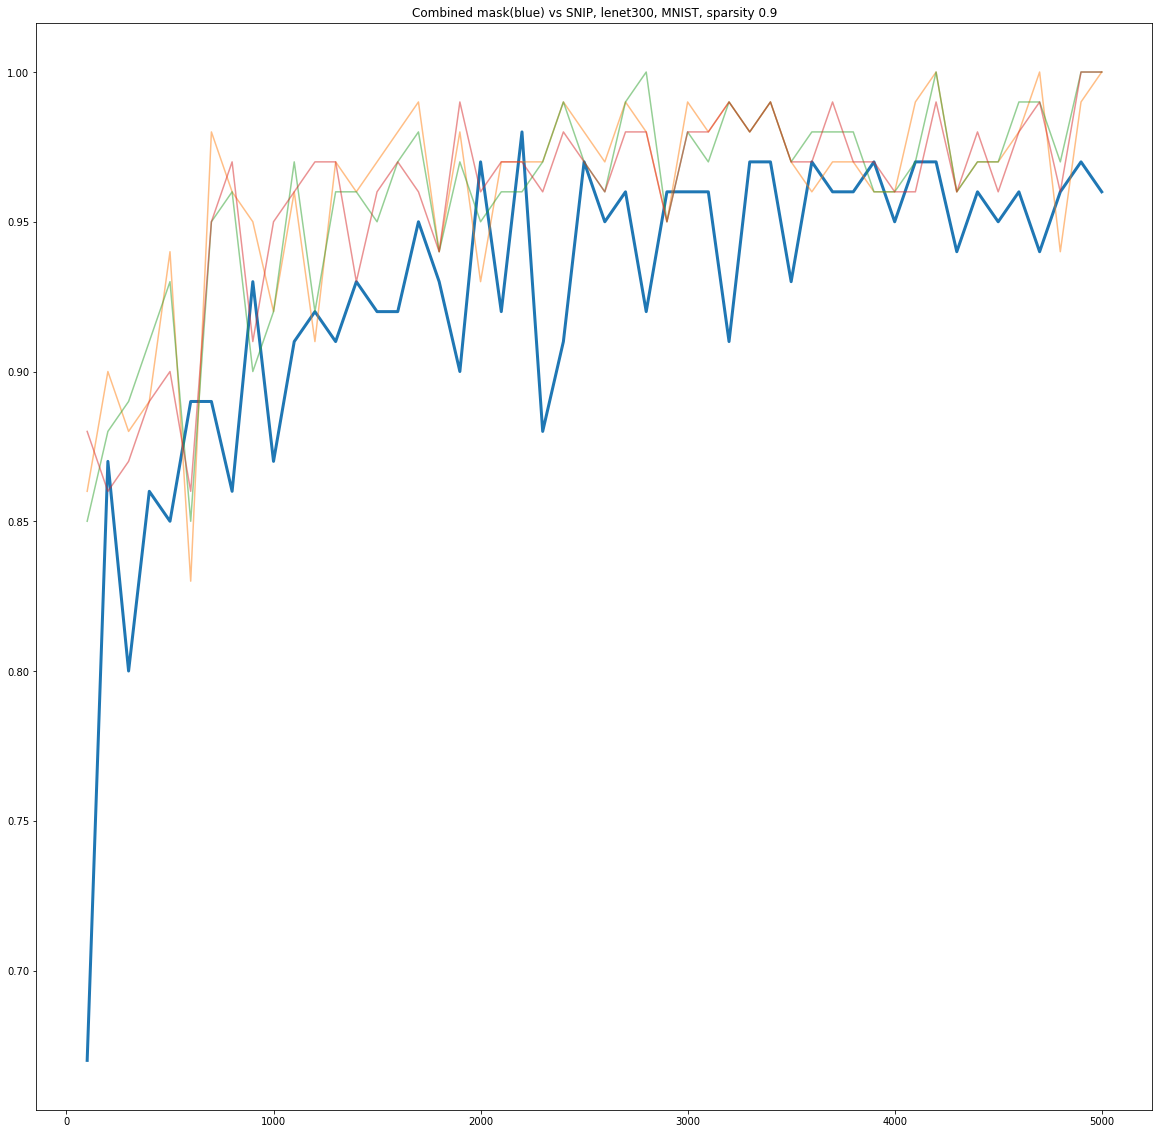

In [74]:
plt.figure(figsize=(20,20))
plt.plot([i*100 for i in range(1, 51)], accs_tr_avg_mask, linewidth=3)
for mask in accs_tr_rnd_mask:
    plt.plot([i*100 for i in range(1, 51)], mask, alpha=0.5)
plt.title('Combined mask (blue) vs SNIP, lenet300, MNIST, sparsity 0.9')

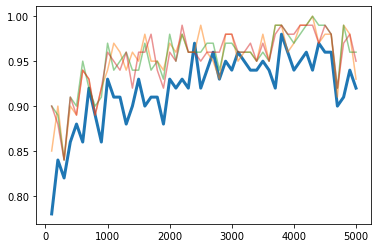

In [62]:
plt.plot([i*100 for i in range(1, 51)], accs_ts_avg_mask, linewidth=3)
for mask in accs_ts_rnd_mask:
    plt.plot([i*100 for i in range(1, 51)], mask, alpha=0.5)

In [ ]:
# Errors:
# 2.1, 2.7, 2.5, 2.8
# 1.8